In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
# notice how we used np.random.uniform like in our random_numbers book
# we are also putting the result array into a variable lats=lattitudes
# lngs=longitudes size is how large the array will be  
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)
lat_lngs


The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-65.3860016541127 -5.0611763328753625
-9.932700318009907 95.38079248783106
54.42459048985327 -169.43176086950734
-50.32320188555811 77.79757056725339
13.63264822592302 5.363434710081691
-50.19298927124464 103.92758653785961
72.87179210467289 133.10700057253177
-14.979197497316648 -41.9536256833631
-36.12913217237656 -70.32436750462809
72.47037708795915 146.05073669475058
-16.99107908548355 18.29506127561774
-84.0173185738041 40.607270104924254
2.164106808683144 127.37849628915018
48.41818026860352 -43.35838294987937
-12.913467475689515 126.07543823888466
-59.63415698417838 -116.42048485578319
-5.6379547437745 114.19273311238481
45.67864560155792 -29.77689796053275
61.42996140561624 106.5454649032946
-89.08637649340322 -82.26154945150859
79.6274998930968 -106.57986245101199
4.982621564910659 120.56000376265337
-33.270754514846274 -66.13179637782511
31.68936479979196 20.21159130728995
-84.77697087411643 -141.09597739170738
46.22874585346108 126.86007353519165
17.140555019910067 109.82082

73.84033793059626 -56.8704902852854
-0.7284221278033698 12.57743421749285
-27.906745729138166 35.83652149154315
74.81261179300029 -115.1948901246068
50.402744301616394 -41.174434100394336
37.736893007289765 -58.07076401207142
-29.627139716798595 -48.17305838542438
82.02992854684203 113.88619666825969
42.73380632787297 -65.90121490804744
89.58777762633301 45.41020454996948
-60.06526090288867 43.11825893579115
11.3971472133599 -57.559716737448014
0.16118012085618716 -44.89820515185221
-18.015862848300998 95.99184366444308
58.2589841667849 -161.50869082969848
58.90661352497929 -97.25556444626618
-43.559931704807894 -177.81435958398083
38.30224042915475 -51.01982061035213
37.97552470211937 -95.77655287285013
-34.32826765824218 79.6322052809972
-11.810282842145142 -27.743774988555828
-69.16640811943378 -65.46620081234686
-39.55033032028088 -69.37409584467969
84.19783291222785 136.9196552656869
-6.961701273912894 178.95257504253016
-8.61406783798654 33.61578514047338
57.88928304686354 73.404

46.97997838164278 87.23672913007982
-43.842100213887136 140.52638875771413
-20.41982487927946 -178.79673120356392
21.067438864528896 -105.09863474212976
-60.74122545434054 -118.72293803838556
89.02593656531937 112.70663499576591
63.817222374742784 119.93179626874462
-20.169022797766928 -9.133813863174623
-53.88782675416812 -91.44023959118434
-36.73912320223773 -76.95271693901249
16.486602278163986 -161.52052092623677
-17.76349626361612 151.98731420598295
11.327693812322394 23.980664427834824
32.620503435879996 5.37493082880826
56.49664379585744 -34.039782756075965
-42.520770647878095 64.1281677560784
-5.452137293251155 105.88815613645767
73.59831757418365 48.13337262351024
32.85833521040449 -109.35272404148229
-7.330083804152721 -107.93724223278639
75.64304665871231 -24.11426841852068
46.53486309110184 113.14987861678947


In [5]:
# importing the citipy module it also has a github account for more info
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

889

Some of this code should look familiar, but let's break it down:

We create a cities list to store city names.

We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.

We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# # Create an empty list to hold the weather data. this code is later being reused 
# # so this code will be commented out
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# Create counters.
# record_count = 1
# set_count = 1
# # In the code block, we have initialized the counters at 1 because we want 
# # the first iteration of the logging for each recorded response and 
# # the set to start at 1.

Loop Through the List of Cities and Build the City URL
Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. The OpenWeatherMap API only allows 60 calls for per minute on their free tier, so pausing our program for one minute after each set of 50 will prevent time-out errors. We can also retrieve the city from the cities list and add it to the city_url by using indexing, as shown in the following code:

In [10]:
# # Loop through all the cities in our list. this code will cause an error is for 
# # example purposes 
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

REASON WHY ABOVE CODE IS WRONG:
Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

Let's break down the code so we understand fully before continuing: (code on the cell below)

We create the for loop with the enumerate() method and reference the index and the city in the list.

In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count are incremented by 1.

Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.

Also, we add a print statement that tells us the record count and set count, and the city that is being processed.

Then we add one to the record count before the next city is processed.

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
# 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# We can add a try-except block to our code and, below the tryblock,
# we will parse the data from the JSON file and add the data to the cities list.
# Let's add a try block. Then, below the try block, do the following:
# Parse the JSON file.
# Assign variables for each piece of data we need.
# Add the data to the cities list in a dictionary format.  
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | sokoto
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | sao joao do paraiso
Processing Record 9 of Set 1 | san clemente
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | rundu
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | ternate
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | soe
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | sumenep
Processing Record 18 of Set 1 | lagoa
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | sapa
Processing R

City not found. Skipping...
Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | byron bay
Processing Record 39 of Set 4 | pangai
Processing Record 40 of Set 4 | honningsvag
Processing Record 41 of Set 4 | ladario
Processing Record 42 of Set 4 | coihaique
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | kilindoni
Processing Record 45 of Set 4 | bredasdorp
Processing Record 46 of Set 4 | kasongo
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | oussouye
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 5 | kibaya
Processing Record 6 of Set 5 | awash
Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5

Processing Record 24 of Set 8 | la palma
Processing Record 25 of Set 8 | lompoc
Processing Record 26 of Set 8 | tecolutla
Processing Record 27 of Set 8 | russell
Processing Record 28 of Set 8 | kyrylivka
Processing Record 29 of Set 8 | seoul
Processing Record 30 of Set 8 | weligama
Processing Record 31 of Set 8 | ilulissat
Processing Record 32 of Set 8 | beyneu
Processing Record 33 of Set 8 | kargil
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | chagda
City not found. Skipping...
Processing Record 37 of Set 8 | waipawa
Processing Record 38 of Set 8 | norman wells
Processing Record 39 of Set 8 | tahe
Processing Record 40 of Set 8 | luganville
Processing Record 41 of Set 8 | hit
Processing Record 42 of Set 8 | forecariah
Processing Record 43 of Set 8 | mga
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | sandpoint
Processing Record 46 of Set 8 | san pedro
Processing Record 47 of Set 8 | raudeber

Processing Record 15 of Set 12 | dinsor
City not found. Skipping...
Processing Record 16 of Set 12 | siavonga
Processing Record 17 of Set 12 | jequitinhonha
Processing Record 18 of Set 12 | ashland
Processing Record 19 of Set 12 | sorland
Processing Record 20 of Set 12 | mahibadhoo
Processing Record 21 of Set 12 | zhaotong
Processing Record 22 of Set 12 | cordoba
Processing Record 23 of Set 12 | dutlwe
Processing Record 24 of Set 12 | namibe
Processing Record 25 of Set 12 | broken hill
Processing Record 26 of Set 12 | havelock
Processing Record 27 of Set 12 | nioro
Processing Record 28 of Set 12 | kavieng
Processing Record 29 of Set 12 | okha
Processing Record 30 of Set 12 | mahajanga
Processing Record 31 of Set 12 | sukumo
Processing Record 32 of Set 12 | lamu
Processing Record 33 of Set 12 | sakaiminato
Processing Record 34 of Set 12 | santiago del estero
Processing Record 35 of Set 12 | berlevag
Processing Record 36 of Set 12 | rivadavia
Processing Record 37 of Set 12 | sobolevo
Pro

Processing Record 50 of Set 15 | praya
Processing Record 1 of Set 16 | navolato
Processing Record 2 of Set 16 | ramhormoz
Processing Record 3 of Set 16 | wahran
City not found. Skipping...
Processing Record 4 of Set 16 | ojinaga
Processing Record 5 of Set 16 | icanti
City not found. Skipping...
Processing Record 6 of Set 16 | valga
Processing Record 7 of Set 16 | naantali
Processing Record 8 of Set 16 | xiangdong
City not found. Skipping...
Processing Record 9 of Set 16 | kotido
Processing Record 10 of Set 16 | koslan
Processing Record 11 of Set 16 | beitbridge
Processing Record 12 of Set 16 | lobito
Processing Record 13 of Set 16 | sechura
Processing Record 14 of Set 16 | mumbwa
Processing Record 15 of Set 16 | gardenstown
Processing Record 16 of Set 16 | jacmel
Processing Record 17 of Set 16 | marica
Processing Record 18 of Set 16 | kamaishi
Processing Record 19 of Set 16 | vrangel
Processing Record 20 of Set 16 | marsaxlokk
Processing Record 21 of Set 16 | yulin
Processing Record 22

Let's review the code: (explanation of code starting at Try and ending on the
print)

We parse the JSON file for the current city.
If there is no weather data for the city, i.e., a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.
IMPORTANT

In [12]:
# this code is to make sure that our previous code retrieve more 
# than 500 random cities if we didnt get enough we would have to go back 
# to our previous code were we generated random latitudes and longituded 
# combinations and increased the size 
len(city_data)

808

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame. we are converting
# the data pull from the ipa and that was placed in the empty list city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,64.90,78,0,11.01,ZA,2022-10-17 22:59:26
1,Bengkulu,-3.8004,102.2655,74.88,90,100,3.24,ID,2022-10-17 22:58:23
2,Bethel,41.3712,-73.4140,61.56,83,100,3.62,US,2022-10-17 22:59:11
3,Mahebourg,-20.4081,57.7000,70.09,73,20,5.75,MU,2022-10-17 22:59:53
4,Sokoto,13.0609,5.2390,82.00,21,14,6.04,NG,2022-10-17 22:59:53
5,Busselton,-33.6500,115.3333,52.66,83,1,4.52,AU,2022-10-17 22:55:46
6,Sao Joao Do Paraiso,-15.3136,-42.0144,70.57,62,5,8.30,BR,2022-10-17 22:59:54
7,San Clemente,33.4270,-117.6120,87.55,73,3,5.01,US,2022-10-17 22:59:54
8,Chokurdakh,70.6333,147.9167,14.54,96,99,7.63,RU,2022-10-17 22:58:32
9,Rundu,-17.9333,19.7667,72.72,44,64,5.93,NA,2022-10-17 22:59:55


In [14]:
# rearranging the order of the columns in our city_data_df
# easisest way is to assing a variable and put our columns names in the 
# order we want them and then call that variable into the exicisting dataframe
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity','Cloudiness', 'Wind Speed']
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-10-17 22:59:26,-33.9258,18.4232,64.90,78,0,11.01
1,Bengkulu,ID,2022-10-17 22:58:23,-3.8004,102.2655,74.88,90,100,3.24
2,Bethel,US,2022-10-17 22:59:11,41.3712,-73.4140,61.56,83,100,3.62
3,Mahebourg,MU,2022-10-17 22:59:53,-20.4081,57.7000,70.09,73,20,5.75
4,Sokoto,NG,2022-10-17 22:59:53,13.0609,5.2390,82.00,21,14,6.04
5,Busselton,AU,2022-10-17 22:55:46,-33.6500,115.3333,52.66,83,1,4.52
6,Sao Joao Do Paraiso,BR,2022-10-17 22:59:54,-15.3136,-42.0144,70.57,62,5,8.30
7,San Clemente,US,2022-10-17 22:59:54,33.4270,-117.6120,87.55,73,3,5.01
8,Chokurdakh,RU,2022-10-17 22:58:32,70.6333,147.9167,14.54,96,99,7.63
9,Rundu,NA,2022-10-17 22:59:55,-17.9333,19.7667,72.72,44,64,5.93


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

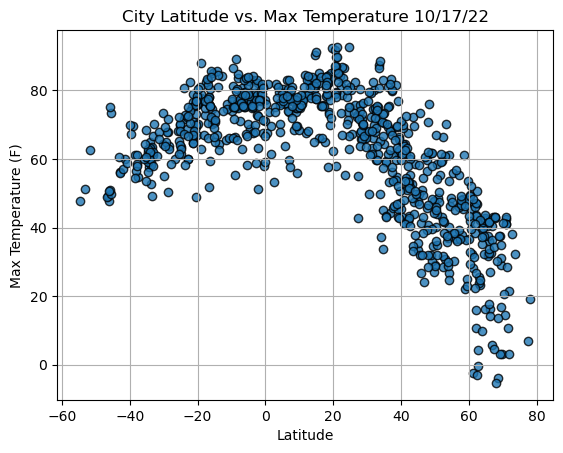

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


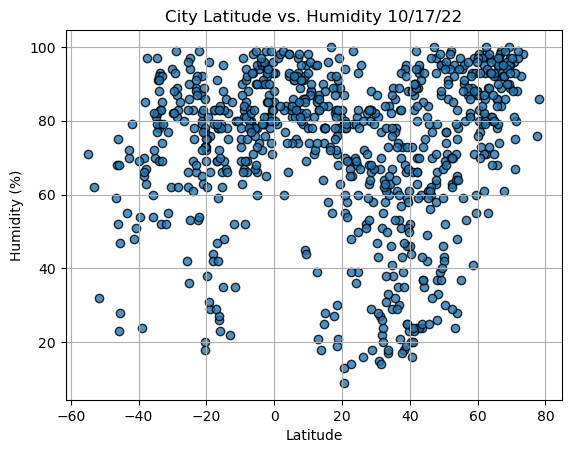

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

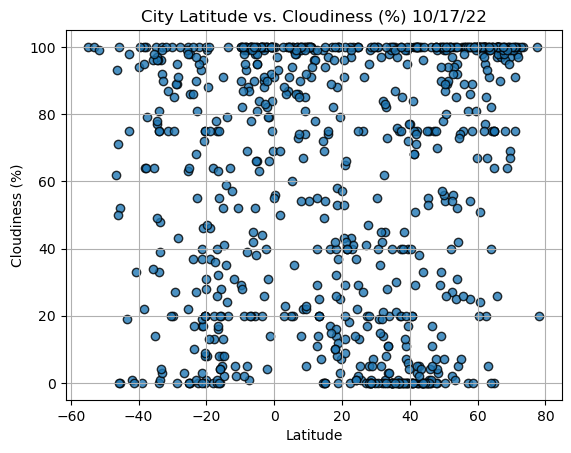

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

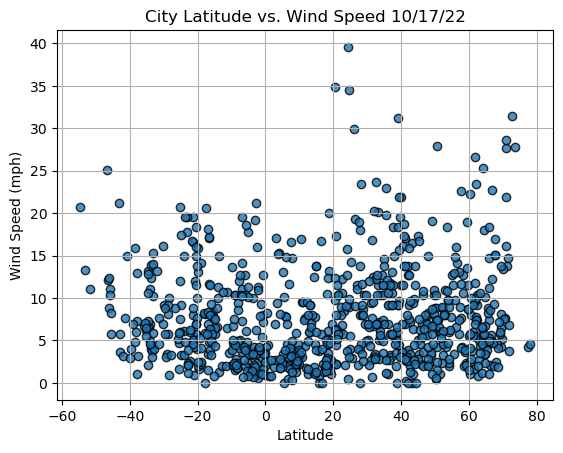

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
#   If we run this code there will be no output until we call the function with five parameters.  

Create the Hemisphere DataFrames
We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.

In [22]:
# this line of code is partaining to the comments above this cell we are 
# we are using the loc method to pull in the item in the index position 13
index13 = city_data_df.loc[13]
index13

City                          Soe
Country                        ID
Date          2022-10-17 22:59:57
Lat                       -9.8607
Lng                       124.284
Max Temp                    74.07
Humidity                       73
Cloudiness                    100
Wind Speed                   2.15
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.



In [23]:
# this code is pertaining the comments above
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
803     True
804     True
805    False
806     True
807     True
Name: Lat, Length: 808, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for 

latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

In [24]:
# code pertaining the comments above noticed that this code is combining 
# both of the previous codes and running in in this cell we are no longer using
# a variable 
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bethel,US,2022-10-17 22:59:11,41.3712,-73.4140,61.56,83,100,3.62
4,Sokoto,NG,2022-10-17 22:59:53,13.0609,5.2390,82.00,21,14,6.04
7,San Clemente,US,2022-10-17 22:59:54,33.4270,-117.6120,87.55,73,3,5.01
8,Chokurdakh,RU,2022-10-17 22:58:32,70.6333,147.9167,14.54,96,99,7.63
11,Ternate,ID,2022-10-17 22:59:55,0.8000,127.4000,81.95,79,97,4.41
...,...,...,...,...,...,...,...,...,...
802,Las Varas,MX,2022-10-17 23:22:27,21.1667,-105.1667,92.68,79,42,5.14
803,Verkhnevilyuysk,RU,2022-10-17 23:18:02,63.4453,120.3167,24.80,98,100,3.56
804,Nanakuli,US,2022-10-17 23:22:27,21.3906,-158.1547,85.10,54,40,10.36
806,Safford,US,2022-10-17 23:22:28,32.8340,-109.7076,74.32,38,100,12.66


In [25]:
# Also, since this is a DataFrame, we can add the head() method
# at the end to get the first five rows, not counting the row of column 
# headings.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bethel,US,2022-10-17 22:59:11,41.3712,-73.4140,61.56,83,100,3.62
4,Sokoto,NG,2022-10-17 22:59:53,13.0609,5.2390,82.00,21,14,6.04
7,San Clemente,US,2022-10-17 22:59:54,33.4270,-117.6120,87.55,73,3,5.01
8,Chokurdakh,RU,2022-10-17 22:58:32,70.6333,147.9167,14.54,96,99,7.63
11,Ternate,ID,2022-10-17 22:59:55,0.8000,127.4000,81.95,79,97,4.41


In [26]:
# Create Northern and Southern Hemisphere DataFrames. the previous cells of 
# code were practice to get to this point
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

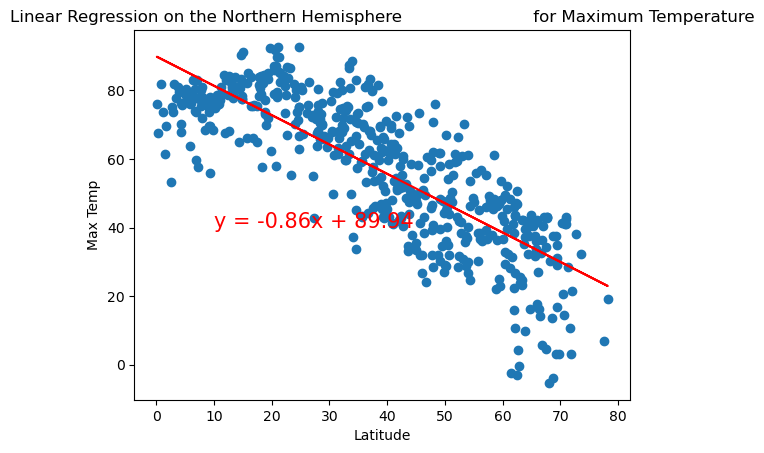

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

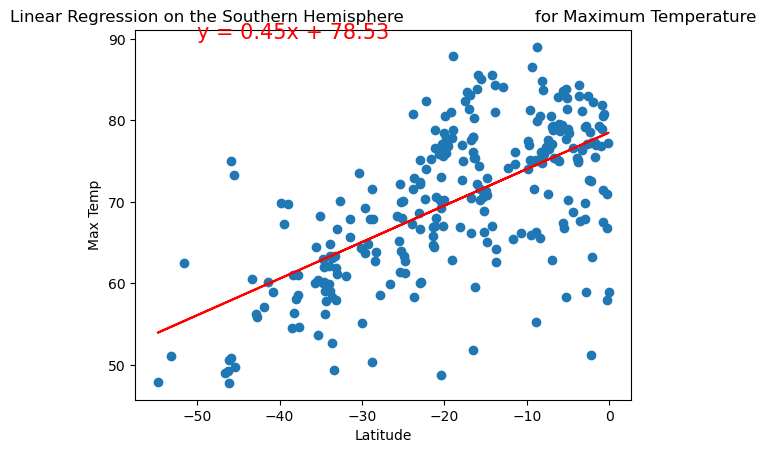

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

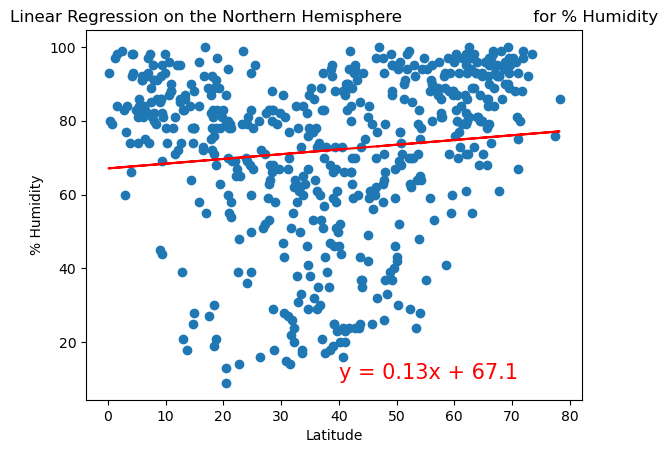

In [29]:
# Linear regression on the Northern Hemisphere for huminidity 
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

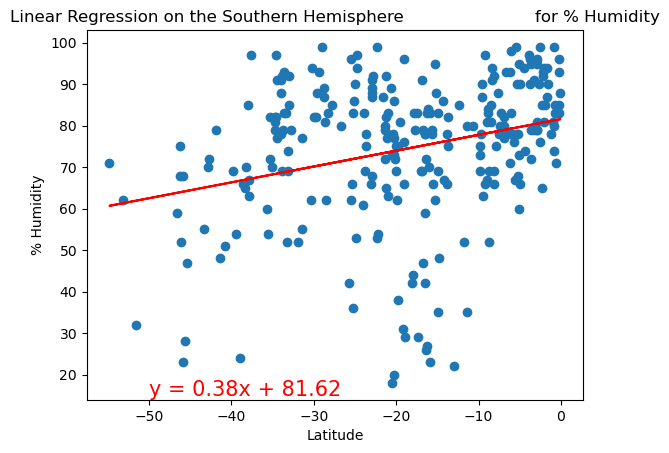

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

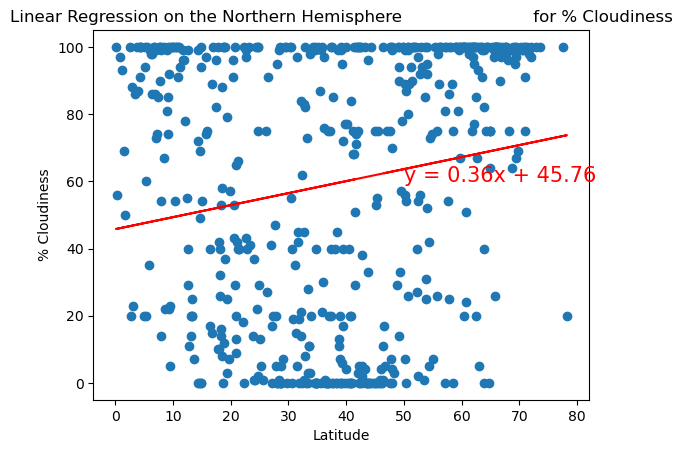

In [41]:
# Linear regression on the Notherm Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,60))

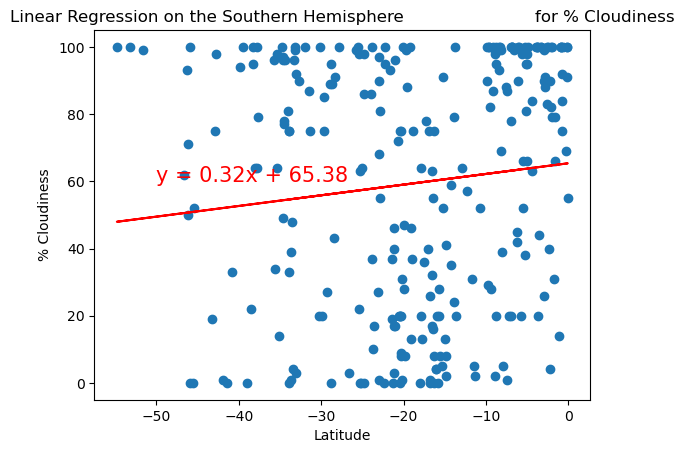

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))